# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.

In [28]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Only Set to 15
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#Only Set to 15
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities
#Plots are listed in Imperial
units = "imperial"
#Manual API option
#api_key = "575be4a8306d0d32bee4173eadc6482c"

In [31]:
# Test for city of London to see if URL and API work
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url_test = f"{base_url}appid={api_key}&units={units}&q=london"
response=requests.get(query_url_test).json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 73.56,
  'pressure': 1008,
  'humidity': 50,
  'temp_min': 69.8,
  'temp_max': 75.99},
 'visibility': 10000,
 'wind': {'speed': 18.34, 'deg': 250},
 'clouds': {'all': 20},
 'dt': 1563633363,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0089,
  'country': 'GB',
  'sunrise': 1563595592,
  'sunset': 1563653207},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [32]:
#Date format not operable
#https://avilpage.com/2014/11/python-unix-timestamp-utc-and-their.html
#datetime.datetime.utcfromtimestamp(response["dt"])
#datetime.datetime(2019, 7, 20, 16, 0, 0)

datetime.datetime(2019, 7, 20, 16, 0)

In [33]:
# Create empty lists to append the API data into lists 
city_name = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 0
set= 1
count= 0

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    
    #used to count to 50 and reset
    if count == 50:
        #sets a sleep period for api
       time.sleep(1)
       count = 0
       record = 0
       set+=1
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{base_url}appid={api_key}&units={units}&q={city}").json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
                
        # Increase counter by one 
        count += 1
        record += 1
        
        #Print log of each city as it's being processed with the city name.
        print(f"Processing Record {record} of Set {set} | {city}")
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
# Log file print statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | aklavik
City not found. Skipping...
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | cabedelo
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | harper
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | the pas
City not found. Skipping...
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | paracatu
Processing Record 15 of Set 1 | saint anthony
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | ambilobe
Processing Record 18 of Set 1 | mangan
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | longyearbyen
Pr

Processing Record 33 of Set 4 | katsuura
Processing Record 34 of Set 4 | goderich
City not found. Skipping...
Processing Record 35 of Set 4 | yulara
Processing Record 36 of Set 4 | mitsamiouli
Processing Record 37 of Set 4 | warrnambool
Processing Record 38 of Set 4 | paslek
Processing Record 39 of Set 4 | manzhouli
City not found. Skipping...
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | makakilo city
Processing Record 42 of Set 4 | road town
Processing Record 43 of Set 4 | lehututu
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | cabra
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | wembley
City not found. Skipping...
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | hualmay
Processing Record 50 of Set 4 | barstow
Processing Record 1 of Set 5 | tonk
Processing Record 2 of Set 5 | novyye burasy
Processing Record 3 of Set 5 | sibolga
Processing Record 4 of Set 5 | gulu
Processing Reco

Processing Record 15 of Set 8 | tafalla
City not found. Skipping...
Processing Record 16 of Set 8 | araouane
Processing Record 17 of Set 8 | nanortalik
Processing Record 18 of Set 8 | springbok
Processing Record 19 of Set 8 | grand baie
City not found. Skipping...
Processing Record 20 of Set 8 | ulaangom
Processing Record 21 of Set 8 | itarema
Processing Record 22 of Set 8 | fairbanks
Processing Record 23 of Set 8 | ambon
City not found. Skipping...
Processing Record 24 of Set 8 | senno
Processing Record 25 of Set 8 | fuyang
City not found. Skipping...
Processing Record 26 of Set 8 | polyarnyye zori
Processing Record 27 of Set 8 | saint-augustin
Processing Record 28 of Set 8 | launceston
Processing Record 29 of Set 8 | constitucion
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | morondava
Processing Record 32 of Set 8 | dorado
Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | goundam
Processing Record 35 of Set 8 | palmer
City not found. Skip

Processing Record 47 of Set 11 | basco
Processing Record 48 of Set 11 | ballitoville
Processing Record 49 of Set 11 | alekseyevka
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    #Unsure if a City ID needs to be displayed, requested in instructions but the example does not show a ID
    #"City ID": city_id,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [35]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Aklavik,90,CA,1563633507,93,68.22,-135.01,57.20,3.56
1,Thompson,20,CA,1563633508,71,55.74,-97.86,57.20,9.17
2,Cabedelo,75,BR,1563633508,88,-6.97,-34.84,77.00,11.41
3,Ushuaia,0,AR,1563633508,74,-54.81,-68.31,33.80,4.59
4,Harper,90,US,1563633508,69,30.30,-99.24,78.01,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

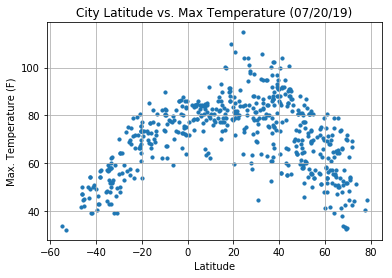

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

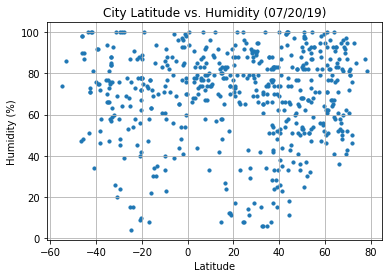

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

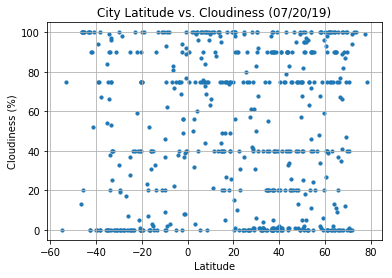

In [38]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

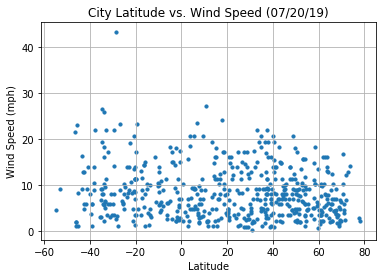

In [39]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

#Three Observable Trends
1. Overall the vast majority of Cities in any latitude have wind speeds below 10 miles per hour. 
2. Cities near the equator have higher humidity than furth away from the equator. However humidity is fairly high in both hemispheres and appear to mirror each other.
3. Temperature graph has the most observable trends with the Equator and Tropics beign the warmest. The Northern Hemisphere is warm during summertime and Southern Hemisphere is cooler due to its winter season.
